In [2]:
from __future__ import division 
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Getting data from a particular galaxy (from online)

# Here we pick which kinds of particles we want (0-gas, 4-stars)
# and what information about them 
# (see http://www.illustris-project.org/data/docs/specifications/)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses']
    #[0,'Coordinates']
    #[0,'Volume']
]
# Here we actually pull the data from online
data=getGalaxy(342260,fields)


# And here we put it into simple numpy arrays to work with
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]
#rGas=data[3][:,:]
#volGas=data[3][:]

In [47]:
# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(rStar,mStar,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<rStar[:,0])
                            &(span*(((2*j)/nPixels)-1)<rStar[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>rStar[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>rStar[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(mStar[inPix])
    return pixels

In [48]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar=len(mStar)
com=findCenterMass(rStar,mStar) # finds the center of mass
rStar=rStar-com # recenters all positions around the center of mass

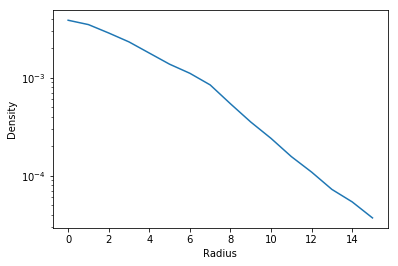

In [49]:
# Finding and plotting the density profile

# finds the distance between every particle and the origin
rSquared=np.zeros(nStar)
for i in range(3):
    rSquared+=rStar[:,i]**2
r=np.sqrt(rSquared) 

# finds all particles in each of a series of radial bins,
# finds the total mass in that bin and divides by the volume
nBins=16
rMax=16
rBins=np.linspace(0,rMax,nBins+1)
density=np.zeros(nBins)
for i in range(nBins):
    inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
    if inBin.size==0:
        continue
    density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)

# plots the denisty
densPlot=plt.gca()
densPlot.semilogy(rBins[:-1],density)
densPlot.set_ylabel('Density')
densPlot.set_xlabel('Radius')
plt.show(densPlot)

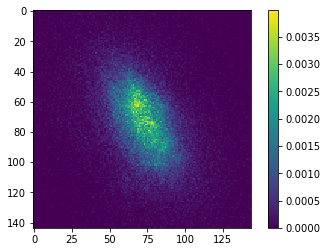

In [53]:
# Making a simple image of the galaxy

pixels=findPixels(rStar,mStar,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [80]:
fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
spiral1=getGalaxy(15,fields)
vGas1=spiral1[0][:]
mGas1=spiral1[1][:]
rGas1=spiral1[2][:,:]

In [81]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [82]:
nStar=len(mStar)
rStar=rGas1-com # recenters

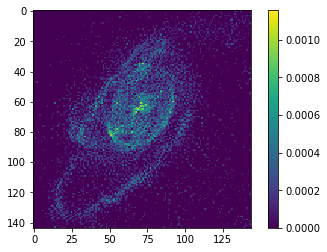

In [96]:
cm=findCenterMass(rGas1,mGas1)
rGas1=rGas1-cm
pixels=findPixels(rGas1,mGas1,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)


In [98]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
spiral2=getGalaxy(300122,fields)
vGas2=spiral2[0][:]
mGas2=spiral2[1][:]
rGas2=spiral2[2][:,:]

In [99]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [100]:
nStar=len(mStar)
rStar=rGas2-com # recenters

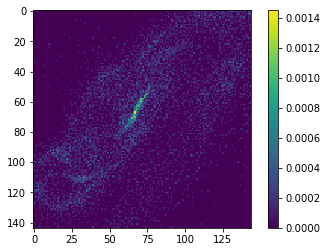

In [101]:
cm=findCenterMass(rGas2,mGas2)
rGas2=rGas2-cm
pixels=findPixels(rGas2,mGas2,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [112]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
ellipticals2=getGalaxy(342260,fields)
vGas3=ellipticals2[0][:]
mGas3=ellipticals2[1][:]
rGas3=ellipticals2[2][:,:]

In [113]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [114]:
nStar=len(mStar)
rStar=rGas3-com # recenters

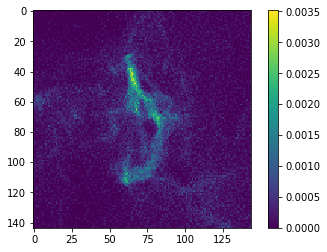

In [115]:
cm=findCenterMass(rGas3,mGas3)
rGas3=rGas3-cm
pixels=findPixels(rGas3,mGas3,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [108]:
fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
ellipticals2=getGalaxy(382533,fields)
vGas4=ellipticals2[0][:]
mGas4=ellipticals2[1][:]
rGas4=ellipticals2[2][:,:]

In [109]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [110]:
nStar=len(mStar)
rStar=rGas3-com # recenters

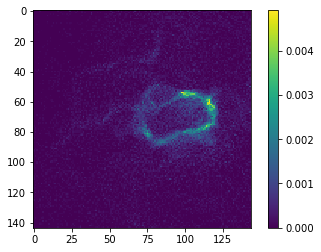

In [111]:
cm=findCenterMass(rGas4,mGas4)
rGas4=rGas4-cm
pixels=findPixels(rGas4,mGas4,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [ ]:
if "" ==